In [38]:
from mplsoccer import Pitch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsbombpy import sb
from mplsoccer import Sbopen
from matplotlib.patches import Circle
from matplotlib.patches import FancyArrowPatch
import gc

In [25]:
parser = Sbopen()
df_competition = parser.competition()
df_matches = parser.match(competition_id=55, season_id=282)
match_id=3943043
df_events, df_related, df_freeze, df_tactics = parser.event(3943043)
parser.event(3788741)
#get team names
team1, team2 = df_events.team_name.unique()
df_events.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'outcome_id', 'outcome_name',
       'under_pressure', 'out', 'counterpress', 'pass_switch',
       'dribble_nutmeg', 'aerial_won', 'pass_cross', 'technique_id',
       'technique_name', 'pass_no_touch', 'foul_won_defensive', 'off_camera',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_one_on_one',
       'shot_statsbomb_xg', 'shot_key_pass_id', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'end_z',

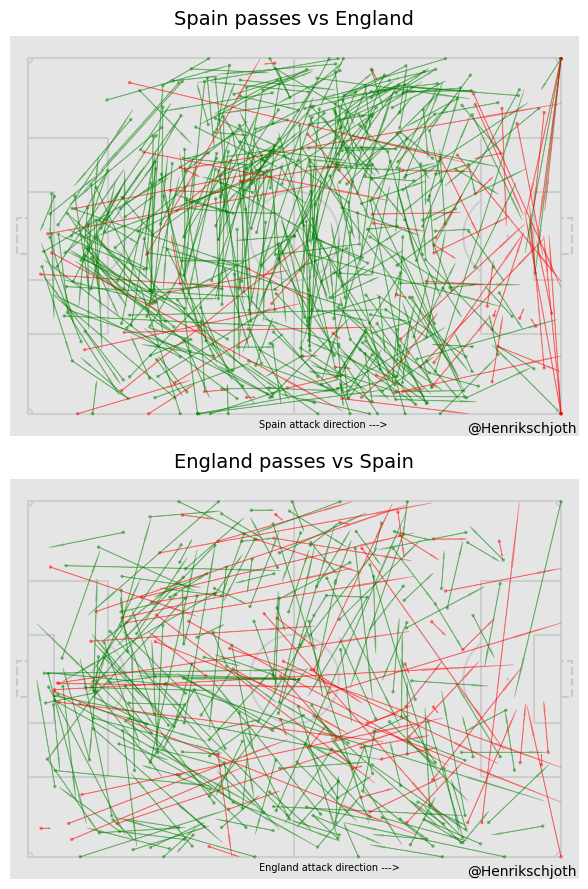

In [89]:
#Creating a plot with passes for each team
#Dataframe of passes
gc.collect()
passes=df_events[df_events['type_name']=='Pass']
passes.columns
#filtering for relevant passinformation in dataframe
passes=passes[['player_id', 'player_name','period', 'minute', 'x', 'y','end_x', 'end_y','pass_recipient_id',
       'pass_recipient_name','team_name',
       'outcome_id', 'outcome_name','team_id','pass_length',]]
gc.collect()
#choosing pitch style
plt.style.use('ggplot')
# Create a figure with two axis
fig, (ax1, ax2) = plt.subplots(2, 1,  figsize=(15, 9))
fig.tight_layout(pad=1.0)
gc.collect()
# Fixing pitch specifics
pitch1 = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', pad_bottom=5, pad_top=5,
              spot_type='circle', spot_scale=0.0025, linewidth=1.5,linestyle='-', goal_type='box', goal_alpha=1,corner_arcs=True,line_alpha=0.8, goal_linestyle='--' )
pitch2 = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', pad_bottom=5, pad_top=5,
              spot_type='circle', spot_scale=0.0025, linewidth=1.5,linestyle='-', goal_type='box', goal_alpha=1,corner_arcs=True,line_alpha=0.8, goal_linestyle='--' )
pitch1.draw(ax=ax1)  #Draw pitches
pitch2.draw(ax=ax2)  

# StatsBomb pitch dimensions
pitchWidthY = 80  
pitchLengthX = 120  
# Plot each shot
gc.collect()
for i, row in passes.iterrows():
    x = row['x']
    y = row['y']
    end_x = row['end_x']
    end_y = row['end_y']
    circleSize = 0.3
    dx = row['end_x'] - row['x']
    dy = row['end_y'] - row['y']
    color='red'
    successful_pass = pd.isnull(row['outcome_name']) 
    fontsize=10
    alpha=0.4
    if row['team_name'] == team1:  # Checks if pass belong to team1
        if successful_pass:  
            color='green'
            circle = Circle((x, y), circleSize, color=color,alpha=alpha)
        else:
            circle = Circle((x, y), circleSize, color=color,alpha=alpha)
        passArrow = plt.Arrow(x, y, dx, dy, width=0.5, color=color,alpha=alpha)    
        ax1.add_patch(circle)
        ax1.add_patch(passArrow)
    else: 
        if successful_pass:  
            color='green'
            circle = Circle((x, y), circleSize, color=color,alpha=alpha)
        else:
            circle = Circle((x, y), circleSize, color=color,alpha=alpha)
        passArrow = plt.Arrow(x, y, dx, dy, width=0.5, color=color,alpha=alpha)    
        ax2.add_patch(circle)
        ax2.add_patch(passArrow)

fontsize=7 
color='black'
#Add text with attack direction
ax1.text(52, 83, team1 + ' attack direction --->', fontsize=fontsize, color=color)
ax2.text(52, 83, team2 + ' attack direction --->', fontsize=fontsize, color=color)
gc.collect()  # just for not getting out of memory  
# Adding text  (axis1)
ax1.annotate(team1 + ' passes vs ' + team2, xy=(0.5, 1.03),  # Posisjon i figurkoordinater (prosent av aksene)
             xycoords='axes fraction',  # Bruker aksenes koordinater
             fontsize=14, color='black', ha='center')

#Adding text(axis2)
ax2.annotate(team2 + ' passes vs ' + team1,
             xy=(0.5, 1.03),  # Posisjon i figurkoordinater (prosent av aksene)
             xycoords='axes fraction',  # Bruker aksenes koordinater
             fontsize=14, color='black', ha='center')


ax1.annotate('@Henrikschjoth',
              xy=(0.9, 0.01), # Posisjon i figurkoordinater (prosent av aksene)
              xycoords='axes fraction',  # Bruker aksenes koordinater
              fontsize=10, color='black', ha='center')

# Tekst på andre akse (ax2)
ax2.annotate('@Henrikschjoth',
              xy=(0.9, 0.01),  # Posisjon i figurkoordinater (prosent av aksene)
              xycoords='axes fraction',  # Bruker aksenes koordinater
              fontsize=10, color='black', ha='center')

#Saving images on my computer
# Get position for ax1 and ax2
ax1_position = ax1.get_position()
ax2_position = ax2.get_position()
#Saving both axis in one image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\passes_teams.jpg', dpi=300)

ax2.set_visible(False)  # Hiding ax2
# Adjusting ax1 to cover whole figure
ax1.set_position([0, 0, 1, 1])
# Tekst på første akse (ax1)
text_ax1= ax1.annotate(team1 + ' passes vs ' + team2, xy=(0.5, 0.975),  # Posisjon i figurkoordinater (prosent av aksene)
             xycoords='axes fraction',  # Bruker aksenes koordinater
             fontsize=14, color='black', ha='center')
text_ax1
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\passes_team1.jpg', dpi=300)
text_ax1.remove()
ax1.set_position(ax1_position)  # Readjust back to original
ax2.set_visible(True)   # Show ax2 again

ax1.set_visible(False)  
ax2.set_position([0, 0, 1, 1])
text_ax2= ax2.annotate(team2 + ' passes vs ' + team1, xy=(0.5, 0.975),  # Posisjon i figurkoordinater (prosent av aksene)
             xycoords='axes fraction',  # Bruker aksenes koordinater
             fontsize=14, color='black', ha='center')
text_ax2
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\passes_team2.jpg', dpi=300)
text_ax2.remove()
ax2.set_position(ax2_position) 
ax1.set_visible(True)   # Show ax1 again

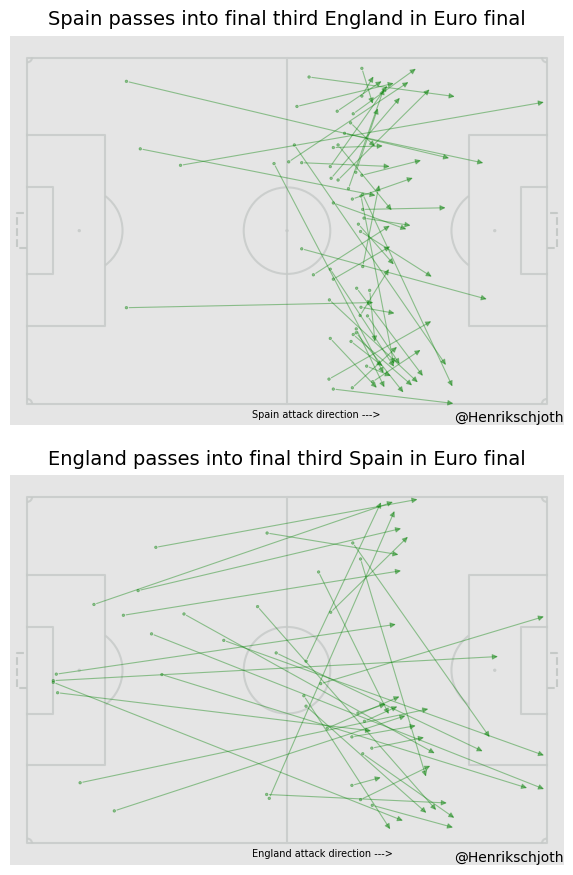

In [93]:
#Creating a visual passmap of each teams passes into final third
#Dataframe of passes
passes=df_events[df_events['type_name']=='Pass']
passes.columns
passes=passes[['player_id', 'player_name','period', 'minute', 'x', 'y','end_x', 'end_y','pass_recipient_id',
       'pass_recipient_name','team_name',
       'outcome_id', 'outcome_name','team_id','pass_length',]]
plt.style.use('ggplot')
# Create a figure with two axis
fig, (ax1, ax2) = plt.subplots(2, 1,  figsize=(16, 9))
fig.tight_layout(pad=1.5)

# Fixing pitch specifics
pitch1 = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', pad_bottom=5, pad_top=5,
              spot_type='circle', spot_scale=0.0025, linewidth=1.5,linestyle='-', goal_type='box', goal_alpha=1,corner_arcs=True,line_alpha=0.8, goal_linestyle='--' )
pitch2 = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', pad_bottom=5, pad_top=5,
              spot_type='circle', spot_scale=0.0025, linewidth=1.5,linestyle='-', goal_type='box', goal_alpha=1,corner_arcs=True,line_alpha=0.8, goal_linestyle='--' )
pitch1.draw(ax=ax1)  #Draw pitches
pitch2.draw(ax=ax2)  

# StatsBomb pitch dimensions
pitchWidthY = 80  
pitchLengthX = 120  
# Plot each shot
for i, row in passes.iterrows():
    x = row['x']
    y = row['y']
    end_x = row['end_x']
    end_y = row['end_y']
    circleSize = 0.3
    dx = row['end_x'] - row['x']
    dy = row['end_y'] - row['y']
    color='red'
    successful_pass = pd.isnull(row['outcome_name']) 
    # Filter passes that end in the final third of the pitch
    final_third_pass = row['x'] <80 and row['end_x'] >=80 
    # Group by player and count the number of passes
    passes_per_player = passes.groupby('player_name').size().reset_index(name='pass_count')
    fontsize=10
    alpha=0.4
    width=0.8
    if row['team_name'] == team1:  # Checks if pass belong to team1
        if final_third_pass:  
            color='green'
            circle = Circle((x, y), circleSize, color=color,alpha=alpha)
            passArrow = FancyArrowPatch((x, y), (x + dx, y + dy),
                            color=color, alpha=alpha, linewidth=width, 
                            arrowstyle='-|>', mutation_scale=8)
            ax1.add_patch(circle)
            ax1.add_patch(passArrow)
    else: 
        if final_third_pass:  
            color='green'
            circle = Circle((x, y), circleSize, color=color,alpha=alpha)
            passArrow =  passArrow = FancyArrowPatch((x, y), (x + dx, y + dy),
                            color=color, alpha=alpha, linewidth=width, 
                            arrowstyle='-|>', mutation_scale=8)
            ax2.add_patch(circle)
            ax2.add_patch(passArrow)
    

# Tekst på første akse (ax1)
ax1.annotate(team1 + ' passes into final third ' + team2 + ' in Euro final',
             xy=(0.5, 1.03),  # Posisjon i figurkoordinater (prosent av aksene)
             xycoords='axes fraction',  # Bruker aksenes koordinater
             fontsize=14, color='black', ha='center')

# Tekst på andre akse (ax2)
ax2.annotate(team2 + ' passes into final third ' + team1 + ' in Euro final',
             xy=(0.5, 1.03),  # Posisjon i figurkoordinater (prosent av aksene)
             xycoords='axes fraction',  # Bruker aksenes koordinater
             fontsize=14, color='black', ha='center')

fontsize=7 
color='black'
ax1.text(52, 83, team1 + ' attack direction --->', fontsize=fontsize, color=color)
#ax1.text(62, 78, '-  Data from statsbomb', fontsize=fontsize, color=color)
ax2.text(52, 83, team2  +' attack direction --->', fontsize=fontsize, color=color)
#ax2.text(62, 78, '- Data from statsbomb', fontsize=fontsize, color=color)
ax1.annotate('@Henrikschjoth',
              xy=(0.9, 0.01), # Posisjon i figurkoordinater (prosent av aksene)
              xycoords='axes fraction',  # Bruker aksenes koordinater
              fontsize=10, color='black', ha='center')
# Add text(axis2)
ax2.annotate('@Henrikschjoth',
              xy=(0.9, 0.01),  # Posisjon i figurkoordinater (prosent av aksene)
              xycoords='axes fraction',  # Bruker aksenes koordinater
              fontsize=10, color='black', ha='center')

# Get position for ax1 and ax2
ax1_position = ax1.get_position()
ax2_position = ax2.get_position()
#Saving both axis in one image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\finalthirdpasses_teams.jpg', dpi=300)

ax2.set_visible(False)  # Hiding ax2
text_ax1= ax1.annotate(team1 + ' passes vs ' + team2, xy=(0.5, 0.975),  # Posisjon i figurkoordinater (prosent av aksene)
             xycoords='axes fraction',  # Bruker aksenes koordinater
             fontsize=14, color='black', ha='center') #legg til text
text_ax1
# Adjusting ax1 to cover whole figure
ax1.set_position([0, 0, 1, 1])
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\finalthirdpasses_team1.jpg', dpi=300)
text_ax1.remove()
ax1.set_position(ax1_position)  # Readjust back to original
ax2.set_visible(True)   # Show ax2 again


ax1.set_visible(False)  
text_ax2= ax2.annotate(team2 + ' passes vs ' + team1, xy=(0.5, 0.975),  # Posisjon i figurkoordinater (prosent av aksene)
             xycoords='axes fraction',  # Bruker aksenes koordinater
             fontsize=14, color='black', ha='center')
text_ax2
ax2.set_position([0, 0, 1, 1])
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\finalthirdpasses_team2.jpg', dpi=300)
text_ax2.remove()
ax2.set_position(ax2_position) 
ax1.set_visible(True)   # Show ax1 again